<a href="https://colab.research.google.com/github/NithikaRamanathan/Quantum-Zeno-Effect/blob/main/ApplicationsofPaperCircuit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scipy

In [ ]:
pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 36.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 46.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 7.3 MB/s eta 0:00:00


In [ ]:
pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=472691c2b06f7d9a66386f9db475def8762511446b371c840466b55101c7d84a
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


In [ ]:
import matplotlib.pyplot as plt
import qiskit
from qiskit import QuantumCircuit, assemble
import numpy as np
from qiskit.circuit import QuantumRegister, ClassicalRegister
from qiskit.circuit.library import RXGate
from qiskit.circuit.library import UGate
from qiskit.circuit.library import CXGate
from scipy.interpolate import interp1d

In [ ]:
pip install qiskit qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 26.3 MB/s eta 0:00:00


In [ ]:
from qiskit_aer import Aer
sim = Aer.get_backend('aer_simulator')

In [ ]:
import numpy as np

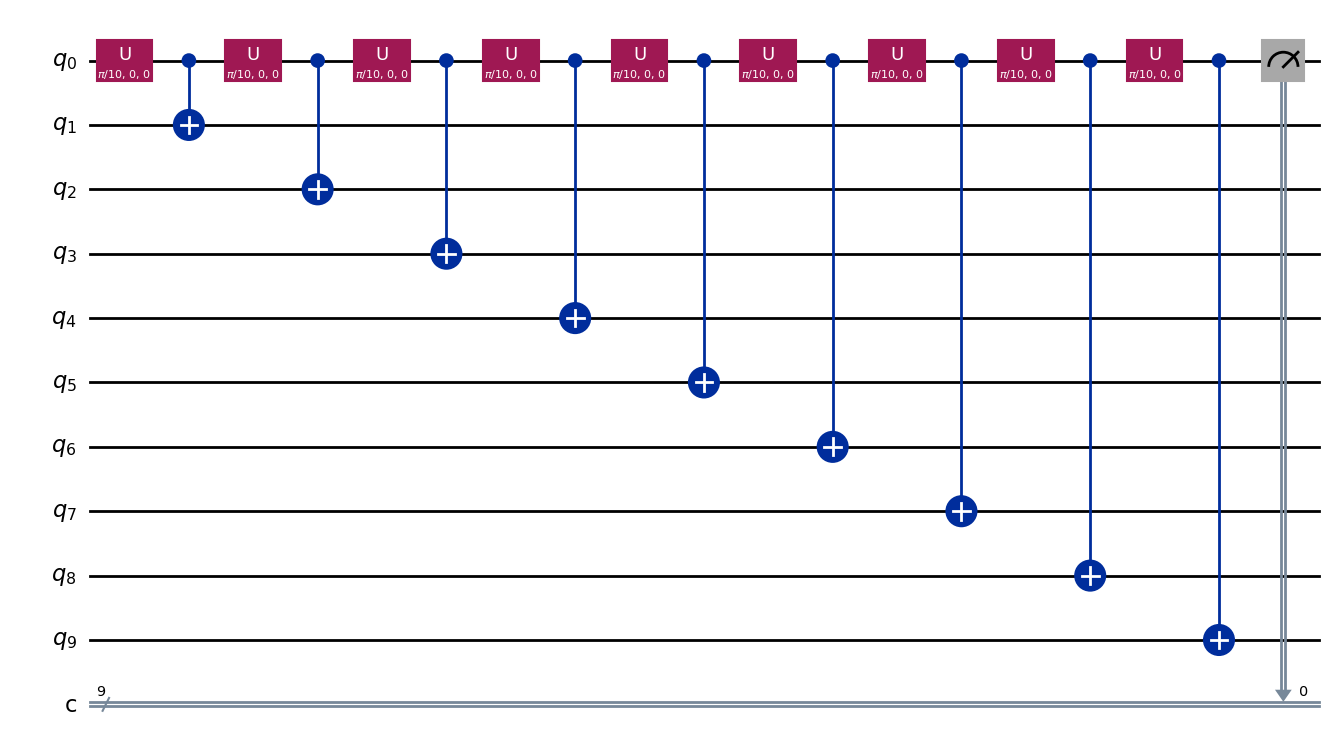

In [ ]:
time_steps = 10 # Choose the number of times to evolve the single qubit with a unitary gate - 20
theta = np.pi/(time_steps) # set parameter to determine how much the qubit's state is rotated with each timestep

qr = QuantumRegister(time_steps, 'q') # - 20
cr = ClassicalRegister(time_steps-1, 'c') # - 19
q_evolve = QuantumCircuit(qr, cr)


for time_step in range(1,time_steps):
    q_evolve.append(UGate(theta,0,0), [qr[0]]) # Add correct number of single-qubit gates to evolve the qubit's state
    if time_step < time_steps: # - 20
        q_evolve.cx(qr[0], qr[time_step])

q_evolve.measure(qr[0],cr[0])
q_evolve.draw("mpl")

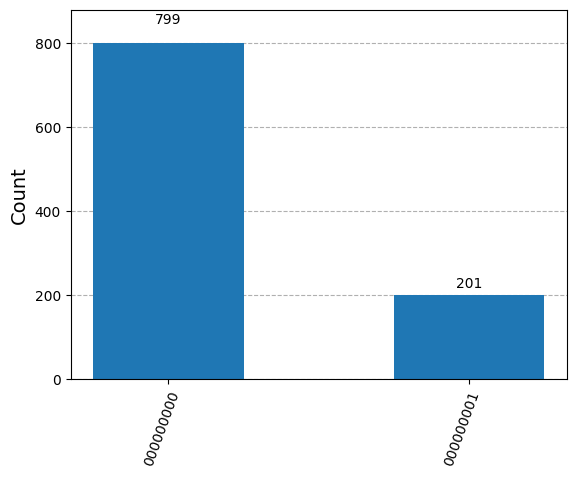

In [ ]:
job = sim.run(q_evolve, shots=1000)
result = job.result()
counts = result.get_counts(q_evolve)

from qiskit.visualization import plot_histogram
plot_histogram(counts)

Text(0.5, 1.0, 'Evolution of state without Zeno effect')

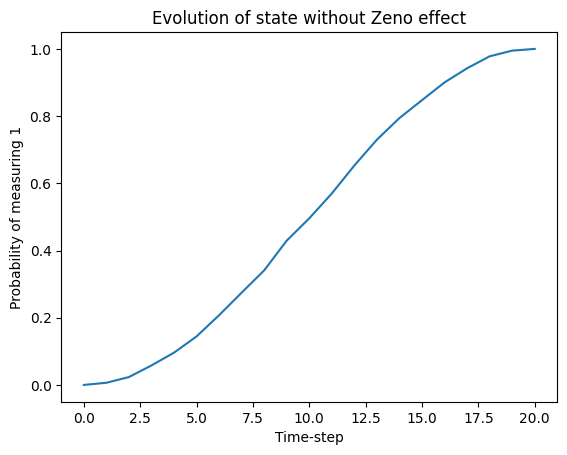

In [ ]:
import matplotlib.pyplot as plt

time_steps = 20

x_values = range(0,time_steps+1)
y_values = list()

for i in range(0,time_steps+1):

    theta = np.pi/time_steps # set parameter to determine how much the qubit's state is rotated with each timestep

    qr = QuantumRegister(1, 'q')
    cr = ClassicalRegister(1, 'c')
    q_evolve = QuantumCircuit(qr, cr)

 #   q_evolve.x(0)

    for time_step in range(i):
        q_evolve.append(UGate(theta,0,0), [qr[0]]) # Add correct number of single-qubit gates to evolve the qubit's state

    q_evolve.measure(qr[0],cr[0])

    shot_number=10000

    job = sim.run(q_evolve, shots=shot_number)
    result = job.result()
    counts = result.get_counts(q_evolve)
    if '1' in counts:
        y_values.append(counts['1']/shot_number)
    else:
        y_values.append(0)

plt.plot(x_values, y_values)
plt.xlabel('Time-step')
plt.ylabel('Probability of measuring 1')
plt.title('Evolution of state without Zeno effect')

Text(0.5, 1.0, 'Evolution of state with and without Zeno effect')

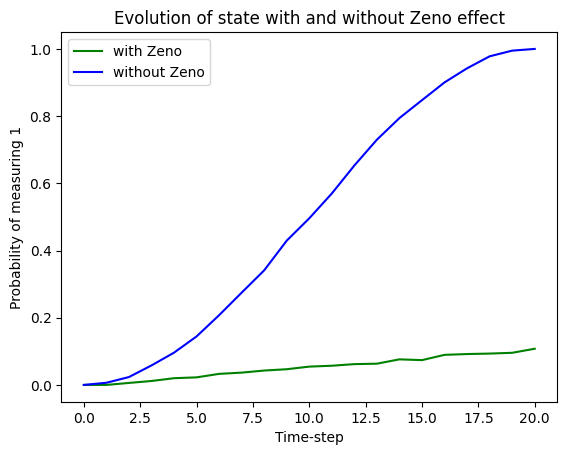

In [ ]:
time_steps = 20

x_values_zeno = range(0,time_steps+1)
y_values_zeno = list()

for i in range(0,time_steps+1):

    theta = np.pi/time_steps # set parameter to determine how much the qubit's state is rotated with each timestep

    qr = QuantumRegister(1, 'q')
    cr = ClassicalRegister(1, 'c')
    q_evolve = QuantumCircuit(qr, cr)

 #   q_evolve.x(0)

    for time_step in range(i):
        if time_step in [0,20]:
          continue

        q_evolve.measure(qr[0],cr[0])
        q_evolve.append(UGate(theta,0,0), [qr[0]]) # Add correct number of single-qubit gates to evolve the qubit's state
        if time_step < len(qr): # - 20
            q_evolve.cx(qr[0], qr[time_step])

    q_evolve.measure(qr[0],cr[0])

    shot_number=10000

    job = sim.run(q_evolve, shots=shot_number)
    result = job.result()
    counts = result.get_counts(q_evolve)
    if '1' in counts:
        y_values_zeno.append(counts['1']/shot_number)
    else:
        y_values_zeno.append(0)

plt.plot(x_values_zeno, y_values_zeno, "g", label="with Zeno")
plt.plot(x_values, y_values,"b", label="without Zeno")
plt.xlabel('Time-step')
plt.ylabel('Probability of measuring 1')
plt.legend()
plt.title('Evolution of state with and without Zeno effect')